In [ ]:
# install yfinance
!pip install yfinance --upgrade --no-cache-dir

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 17.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [109]:
#stock = "aapl"
#aapl= yf.Ticker(stock)
#aapl_historical = aapl.history(start="2022-10-10", end="2022-10-11", interval="30m")

stocks = ["AAPL", "GOOG", "AMZN", "MNST", "WMT", "JPM"]
stocks = ["BA", "LULU", "AAPL", "MNST"]
colors = ['blue', 'green', 'red']

# download historical data
df = [yf.download(stock, period = "2y", interval = "1mo")[["Adj Close"]] for stock in stocks]
for i in range(len(stocks)):
  df[i] = df[i].rename({"Adj Close": stocks[i]}, axis=1)
df = pd.concat(df, axis=1)
df = df.dropna()

# calculate daily % returns
stock_ret = df.pct_change()
stock_ret = stock_ret.dropna()
print(stock_ret.head())

for s in stocks:
  df[s + "_return"] = (df[s].diff())
  #df[s + "_return"] = df[s]
df = df.dropna()
print(df[[s+"_return" for s in stocks]].head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                                 BA      LULU      AAPL      MNST
Date                                                             
2020-12-01 00:00:00-05:00  0.015899 -0.059937  0.116497  0.090823
2021-01-01 00:00:00-05:00 -0.092824 -0.055599 -0.005501 -0.061094
2021-02-01 00:00:00-05:00  0.091766 -0.051722 -0.081085  0.010480
2021-03-01 00:00:00-05:00  0.201453 -0.015946  0.008845  0.038181
2021-04-01 00:00:00-04:00 -0.080127  0.093117  0.076218  0.065430
                            BA_return  LULU_return  AAPL_return  MNST_return
Date                                                                        
2020-11-01 00:00:00-04:00  210.710007   370.220001   117.630043    84.779999
2020-12-01 00:00:00-05:00  214.

BA
-0.01371127382808264
LULU
-0.006270351326569695
AAPL
0.009725490772208143
MNST
0.0031813733522972156
COVARIANCE of percentage returns
            BA      LULU      AAPL      MNST
BA    0.010458  0.000975  0.002448  0.000663
LULU  0.000975  0.008406  0.003858 -0.000534
AAPL  0.002448  0.003858  0.006246  0.001613
MNST  0.000663 -0.000534  0.001613  0.004014


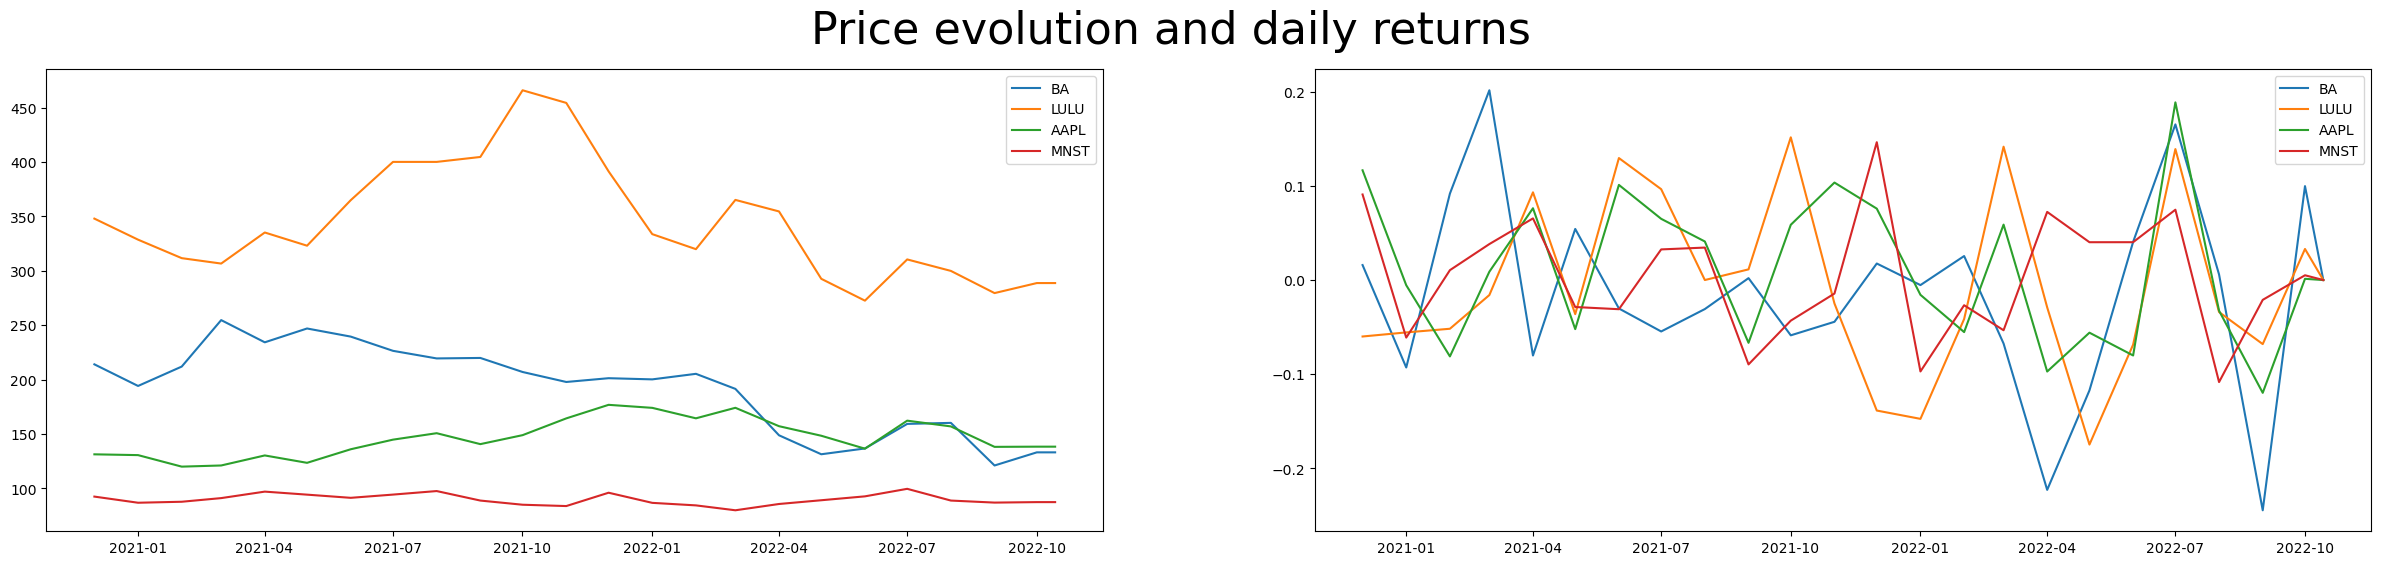

In [108]:
fig, ax = plt.subplots(1, 2, figsize=(30,6))
fig.suptitle('Price evolution and daily returns', fontsize='32')

for s in stocks:
  ax[0].plot(df[s])
  ax[1].plot(stock_ret[s])
  print(s)
  print(stock_ret[s].mean())
print("COVARIANCE of percentage returns")
print(stock_ret.cov())
  

ax[0].legend(stocks)
ax[1].legend(stocks)

BA
191.98719970703124
LULU
344.482001953125
AAPL
145.03948669433595
MNST
89.59440032958985
COVARIANCE of NOT percentage returns
               BA_return  LULU_return  AAPL_return  MNST_return
BA_return    1591.577404  1036.798661  -168.339924    44.910922
LULU_return  1036.798661  2747.125984   258.149943   -25.165161
AAPL_return  -168.339924   258.149943   309.689405   -12.154418
MNST_return    44.910922   -25.165161   -12.154418    24.184368


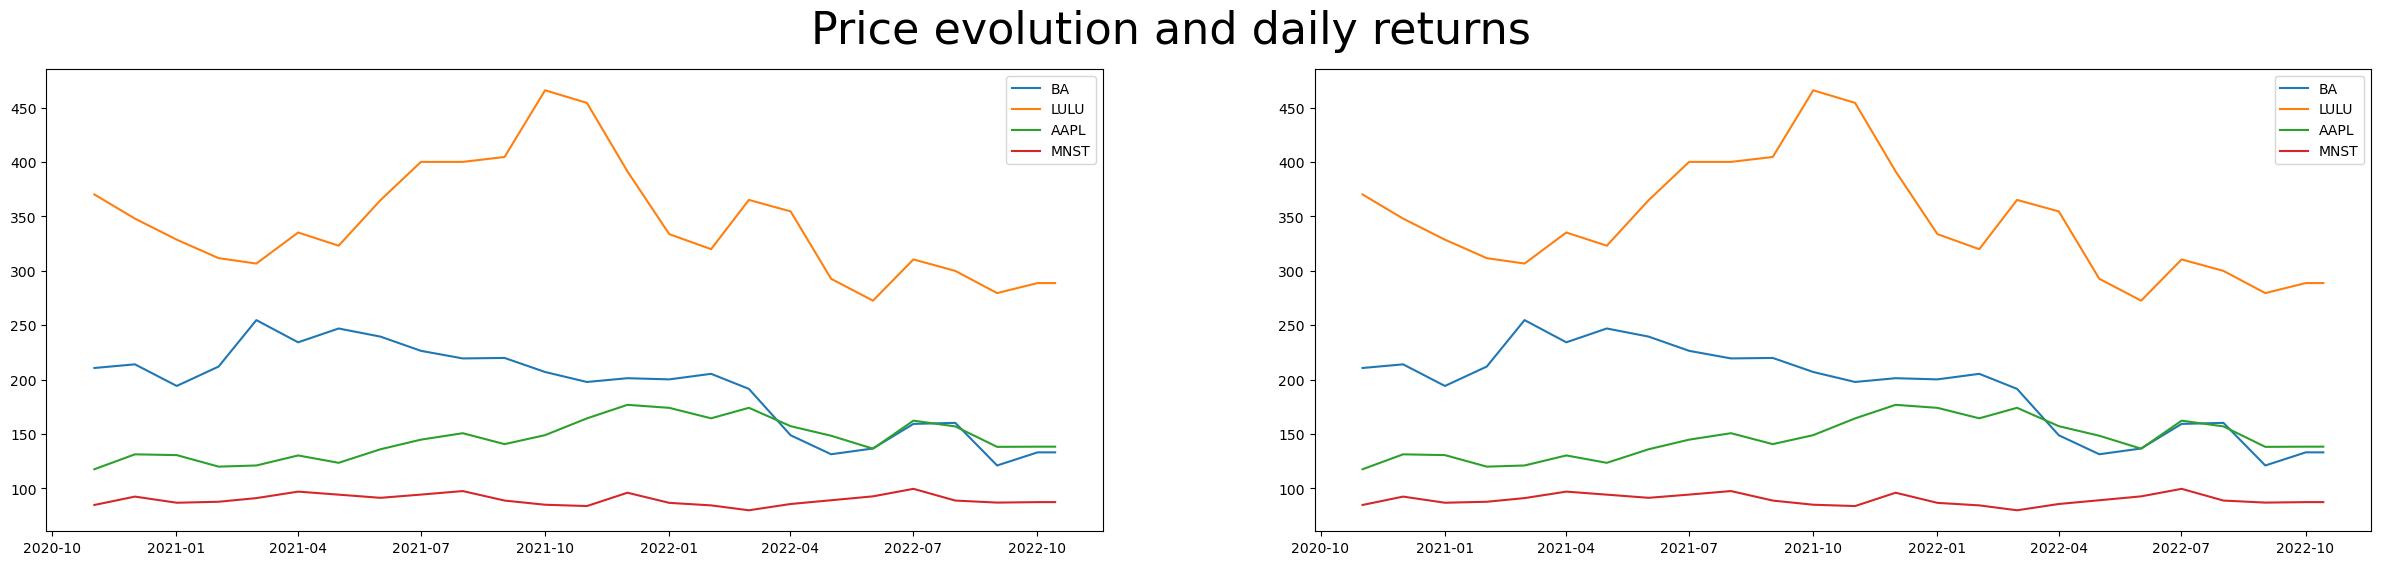

In [110]:
fig, ax = plt.subplots(1, 2, figsize=(30,6))
fig.suptitle('Price evolution and daily returns', fontsize='32')

for s in stocks:
  ax[0].plot(df[s])
  ax[1].plot(df[s+"_return"])
  print(s)
  print(df[s+"_return"].mean())
print("COVARIANCE of NOT percentage returns")
print(df[[s+"_return" for s in stocks]].cov())
  

ax[0].legend(stocks)
ax[1].legend(stocks)